In [0]:
#Need to analyze the lab data which was saved as an excel file - need to import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/Physics Labs/Keller1986Interpolated.xls'
ion_data = pd.read_excel(data_path) #get the excel sheet into a pandas dataframe
ion_data.describe() #see the summary statistics of the data 

,Time (ms),Current (pA) @ -135mV,Current (pA) @ -125mV,Current (pA) @ -115mV,Current (pA) @ -105mV,Current (pA) @ -95mV,Current (pA) @ -85mV,Current (pA) @ -75mV,Current (pA) @ -65mV,Current (pA) @ -55mV
count,18424.000000,18424.000000,18424.000000,18424.000000,18424.000000,18424.000000,18424.000000,18424.000000,18424.000000,18424.000000
mean,182.686071,-0.267778,-0.359433,-0.461806,-0.805449,-1.113676,-1.441122,-1.239320,-1.026051,-0.814420
std,90.121475,0.292927,0.478797,0.552137,0.879105,0.833665,0.562121,0.439278,0.381985,0.132298
min,26.603806,-3.491413,-3.174351,-3.043262,-2.698029,-2.304651,-2.047178,-1.763669,-1.466144,-1.087420
25%,104.644939,-0.288390,-0.326570,-0.356351,-1.305756,-1.985340,-1.815235,-1.509497,-1.259129,-0.885892
50%,182.686071,-0.234141,-0.264781,-0.303068,-0.287281,-1.097361,-1.721414,-1.422002,-1.191623,-0.835563
75%,260.727204,-0.181654,-0.205388,-0.257391,-0.212008,-0.197236,-1.125730,-1.233113,-1.034500,-0.774541
max,338.768337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


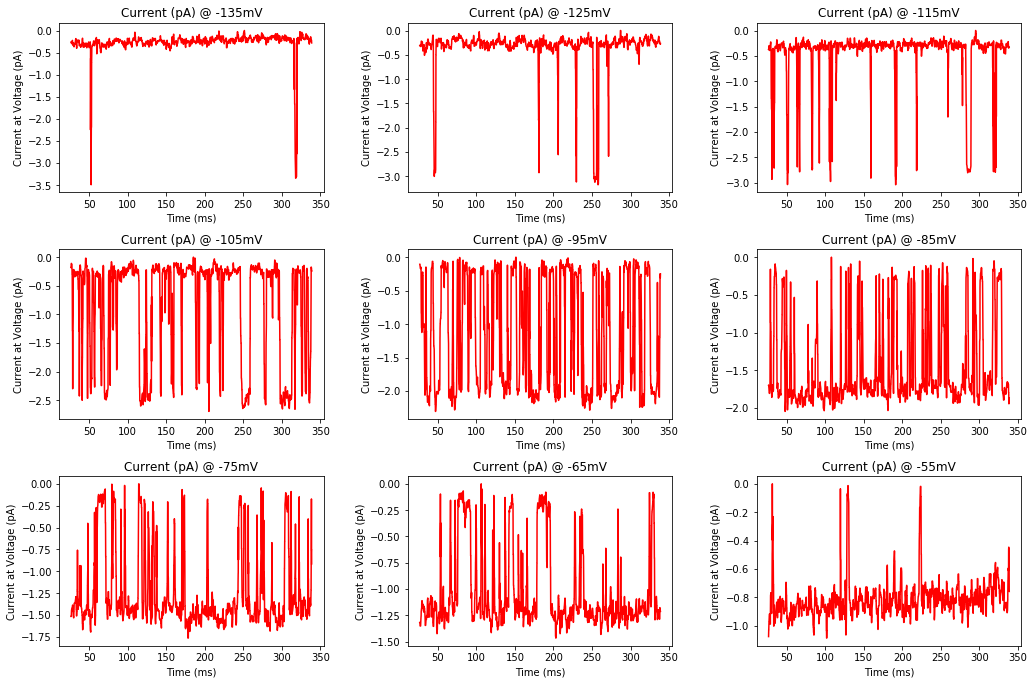

In [0]:
#Plotting the different membrane potentials based on time
fig, axs = plt.subplots(3,3,figsize=(15,10),squeeze=False)
axs[0,0].plot(ion_data['Time (ms)'],ion_data['Current (pA) @ -135mV'], 'r')
axs[0,1].plot(ion_data['Time (ms)'],ion_data['Current (pA) @ -125mV'], 'r')
axs[0,2].plot(ion_data['Time (ms)'],ion_data['Current (pA) @ -115mV'], 'r')
axs[1,0].plot(ion_data['Time (ms)'],ion_data['Current (pA) @ -105mV'], 'r')
axs[1,1].plot(ion_data['Time (ms)'],ion_data['Current (pA) @ -95mV'], 'r')
axs[1,2].plot(ion_data['Time (ms)'],ion_data['Current (pA) @ -85mV'], 'r')
axs[2,0].plot(ion_data['Time (ms)'],ion_data['Current (pA) @ -75mV'], 'r')
axs[2,1].plot(ion_data['Time (ms)'],ion_data['Current (pA) @ -65mV'], 'r')
axs[2,2].plot(ion_data['Time (ms)'],ion_data['Current (pA) @ -55mV'], 'r')
fig.tight_layout(pad=4.0) #pad the outputs

#labelling the plots
i = 1
for ax in axs.flat:
    ax.set(xlabel='Time (ms)', ylabel='Current at Voltage (pA)', title = ion_data.columns[i])
    i = i+1


The min, max and average time interval between data recordings are 0.016900, 0.016900, 0.016900 ms, respectively

The probabilities that the channel are open and closed are 0.017694 and 0.982306, respectively 



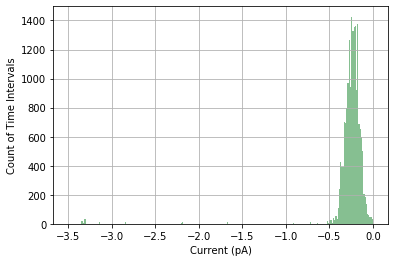

In [0]:
#Calculating probability of channel opening for the first graph (current at -135mV)

#To do this a time interval is needed - use the existing time interval as determined by the time column for analysis
time_intervals = []
for i in range(10):
  time_intervals.append(ion_data['Time (ms)'][i+1]-ion_data['Time (ms)'][i])
average_time = round(np.mean(time_intervals),4) #get the average time data to account for sensitivity in the measurement
min_time = round(min(time_intervals),4)
max_time = round(max(time_intervals),4)
print('The min, max and average time interval between data recordings are %f, %f, %f ms, respectively\n' %(min_time, max_time, average_time))

#Since the time intervals of the data are equal, there is no need to set an interval manually - the data can now be bucketed into a histogram
#given the level of accuracy in the data, creating 250 bins of data should simplify data, while keeping granularity

histogram_135 = ion_data['Current (pA) @ -135mV'].hist(bins = 250, color='#86bf91')
histogram_135.set_xlabel('Current (pA)')
histogram_135.set_ylabel('Count of Time Intervals')

#It appears, that the majority of the time is spent in the closed position (voltages hover between -0.5 and 0) with a fraction of the time open

#From this, the estimate for the threshold voltage = -0.5mV where: if voltage is >-0.5mV, the channel is closed
threshold = -0.5
data1 = ion_data['Current (pA) @ -135mV'] #take the data of the required column and make a new dataframe
count = len(data1[data1 > threshold]) #counts the number of rows with data above the threshold value, and takes the length of that
p_closed = count/len(data1) #takes the ratio of values above the threshold over the total number of values
p_open = 1-p_closed
print('The probabilities that the channel are open and closed are %f and %f, respectively \n' %(p_open, p_closed))

In [0]:
#objective now is to create the plot for all of the different voltage conditions - looking at the graphs generated above
#it is clear that as voltage increases, the channel spends more of it's time open

#As the voltage increases in the middle, there is more variance. To approximate, use the midpoint between the min and max values as threshold

#Make a script to do this and set up the conditions
p_open_list = [] #list for the p_opens
p_open_list.append(p_open) #add the value already generated
col_names = ion_data.columns #get the name of the columns for future use
#threshold_list = [] #make a list of the thresholds
for i in range(2,len(col_names)):
  data = ion_data[col_names[i]]
  midpoint = (data.max()+data.min())/2
  count = len(data[data > midpoint])
  p_open_val = 1-(count/len(data))
  p_open_list.append(p_open_val)
print(p_open_list)

[0.017694311767260107, 0.03712548849326969, 0.0651324359531047, 0.24305254016500222, 0.4848024316109423, 0.7791467650890144, 0.8207229700390795, 0.8086734693877551, 0.9694420321320018]


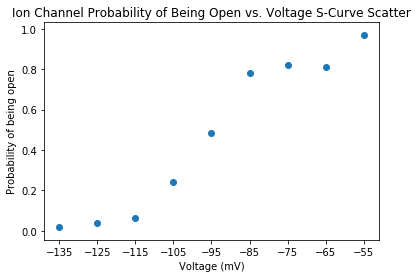

In [0]:
#the p_open list data is growing in an S-curve which is representative of reality for ion channels

#Plot the S-curve
voltage_list = [] #make list for the x-axis
voltage_initial = -135
for i in range(1,len(col_names)): #populates the x-axis list
  voltage_list.append(voltage_initial+10*(i-1))

plt.scatter(voltage_list,p_open_list) #makes an s-curve
plt.xlabel('Voltage (mV)')
plt.ylabel('Probability of being open')
plt.title('Ion Channel Probability of Being Open vs. Voltage S-Curve Scatter')
plt.xticks(voltage_list);
